<a href="https://colab.research.google.com/github/iamdsc/automatic-helmet-detection/blob/master/train_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# mounting google drive to colab to get the training data
from google.colab import drive
drive.mount('/content/drive')

In [0]:
%cp -r 'drive/My Drive/images.zip' 'images.zip'

In [0]:
!unzip images.zip

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop

In [0]:
DATADIR = 'images'
CLASS = ['neg','pos']
IMG_SIZE = 50

neg = []
pos = []

# building the training data
def create_training_data():  
  for cl in CLASS:
    path = os.path.join(DATADIR, cl)
    class_num = CLASS.index(cl)
    if class_num == 0:
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path, img))
          img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
          neg.append([gray_img, class_num])
        except Exception as e:
          pass
    if class_num == 1:
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path, img))
          img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
          pos.append([gray_img, class_num])
        except Exception as e:
          pass
  random.shuffle(neg)
  random.shuffle(pos)
  training_data = neg[:len(pos)]+pos
  return training_data

training_data = create_training_data()

In [0]:
#shuffle the data
random.shuffle(training_data)
print(len(training_data))

In [0]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

In [0]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
# normalizing the data
X = X/255.0

In [0]:
# building the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:], data_format='channels_last',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.summary()

In [0]:
history = model.fit(X, y, batch_size=32, validation_split=0.1, epochs=15)

In [0]:
# helper function to plot the results
def plot_result(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  epochs = range(1, len(acc)+1)

  plt.plot(epochs, acc, label='Training acc')
  plt.plot(epochs, val_acc, label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('epochs')
  plt.ylabel('acc')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()
  
  plt.show()

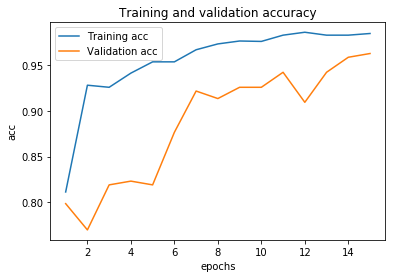

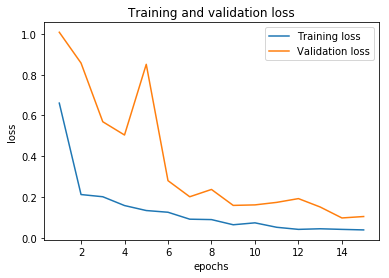

In [0]:
plot_result(history)

In [0]:
model.save('new_helmet_model.h5')